In [1]:
library(ggplot2)
library(ggthemes)
library(ggrepel)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
source("../../scripts/util.R")

In [3]:
table <- read.table(
    'comb_vs_decitabine_delta_exp_table.txt',header=T
)

In [4]:
table %>% 
    select(gene_name,log2FoldChange,pvalue) -> res 
# %>% column_to_rownames('gene_name') 

In [6]:
ncu = read.table(
    'deseq2_norm.txt', sep="\t"#, col.names=TRUE
)

In [7]:
# meta 
conds  <- factor(c(
    rep('Combination',2),rep('Decitabine',2),rep('DMSO',2),rep('rg3039',2)
), levels = c('DMSO','Decitabine','rg3039','Combination'))

reps <- factor(c(
    rep(c('rep1','rep2'),4)
),c('rep1','rep2'))

colData <- data.frame(
    cond=conds,
    reps=reps,
    row.names=colnames(ncu)[-1],
    stringsAsFactors=FALSE
)
colData

,cond,reps
,<fct>,<fct>
hl60_combination_1,Combination,rep1
hl60_combination_2,Combination,rep2
hl60_decitabine_1,Decitabine,rep1
hl60_decitabine_2,Decitabine,rep2
hl60_dmso_1,DMSO,rep1
hl60_dmso_2,DMSO,rep2
hl60_rg3039_1,rg3039,rep1
hl60_rg3039_2,rg3039,rep2


In [14]:
labels <- c(
'ADAM8','CCL3', 'CCR2', 'CD14', 'CD86', 'HLA-E', 'IL12B',
 'IL23A', 'LILRA2', 'LILRA5', 'MAPKAPK2', 'NOD2', 'ORM1',
 'ORM2', 'PTAFR', 'PTPRC', 'PTPRJ', 'THBS1', 'TLR4', 'TLR9', 'TYROBP')

In [15]:
library(RColorBrewer)
library(pheatmap)

heat_colors <- brewer.pal(n = 6, name = "RdYlBu") %>% rev
paired <- brewer.pal(n = 10, name = "Paired")

In [16]:
ann_colors = list(
    cond = c('DMSO'= paired[1], 'Decitabine'=paired[3], 'rg3039'=paired[9],'Combination'=paired[10])
)

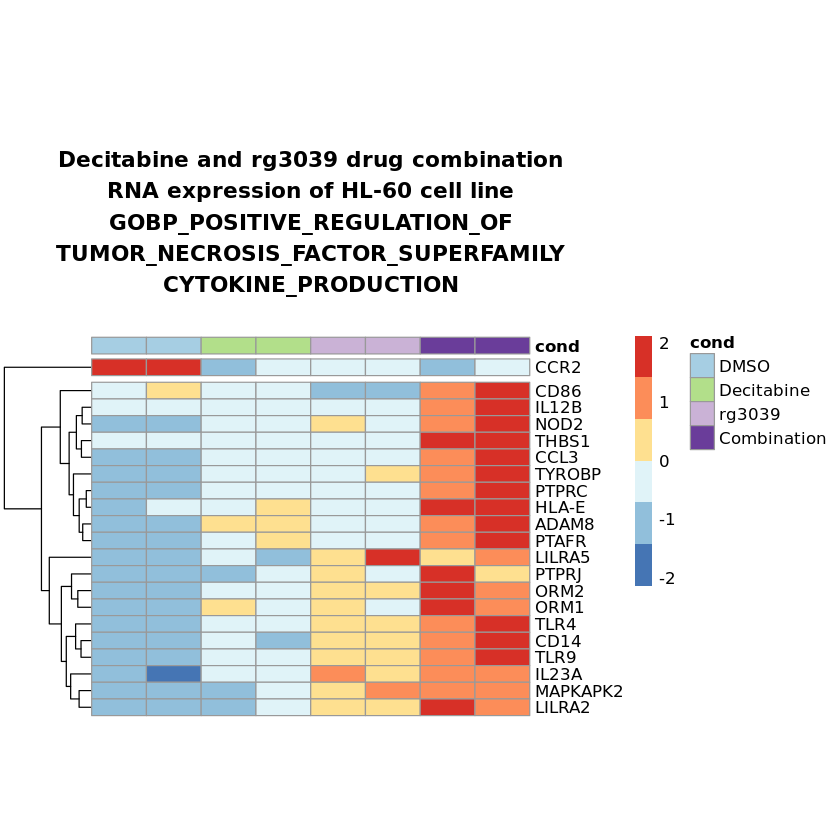

In [17]:
mat <- ncu[
    # subset to selected genes 
    ncu$name %in% labels, 
    # subset normalized counts
    c('name',colData %>% arrange(cond) %>% rownames)
] %>%  remove_rownames %>% column_to_rownames('name') 

mat[rowSums(mat > 10) > 0,] %>%
    # generate heatmap
    pheatmap(
        color = heat_colors, 
        show_colnames = F,
        show_rownames = T,
        cutree_rows = 2,
        main = 'Decitabine and rg3039 drug combination\nRNA expression of HL-60 cell line\nGOBP_POSITIVE_REGULATION_OF\nTUMOR_NECROSIS_FACTOR_SUPERFAMILY\nCYTOKINE_PRODUCTION',
        annotation = colData %>% arrange(cond) %>% select(cond),
        cluster_cols = F, 
        cellheight=10,
        scale = 'row',
        angle_col= 45,
        annotation_colors = ann_colors
) 
# -> hm

# # https://stackoverflow.com/questions/43051525/how-to-draw-pheatmap-plot-to-screen-and-also-save-to-file
# pdf('heatmap_clustering.pdf', width=4, height=7)
# grid::grid.newpage()
# grid::grid.draw(hm$gtable)
# dev.off()

In [17]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /data_gilbert/home/aarab/anaconda3/envs/deseq2/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] forcats_0.5.1   stringr_1.4.0   dplyr_1.0.7     purrr_0.3.4    
 [5] readr_2.0.2     tidyr_1.1.4     tibble_3.1.6    tidyverse_1.3.1
 [9] ggrepel_0.9.1   ggthemes_4.2.4  ggplot2_3.3.5  

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-6     tidyselect_1.1.1 repr_1.1.3      

In [28]:
date()

[1] "Wed Oct 26 18:27:47 2022"